#                                     LetsGrowMore
                       TASK 2 -  HOT ZONE DETECTION FOR TERRORISM
                       BY - MANU SINGH
                       DATA SCIENCE INTERN       

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [7]:
#reading dataset
df = pd.read_csv('terrorism.csv')
df.head(5)

C:\Users\manus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
# how many rows and columns are there
df.shape

(181691, 135)

In [4]:
#statistics of dataset
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991020e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009020e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014080e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017120e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#here we use a correlation matrix which helps to diagnose and summarises the data for the more advanced analysis
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002705,0.018270,0.091762,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009991,-0.017999,-0.014094,-0.165422,0.256114,-0.181613,-0.143600,-0.133252,-0.077851,-0.175606
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002705,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018270,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091762,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181613,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077851,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
#removing unnecessary columns
df.drop(labels=['country_txt', 'region','scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related','hostkidoutcome'],axis=1)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,region_txt,provstate,...,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome_txt,nreleased,addnotes
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Central America & Caribbean,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,North America,Federal,...,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Southeast Asia,Tarlac,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Western Europe,Attica,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,East Asia,Fukouka,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2.017120e+11,2017,12,31,NaN,0,NaN,182,Sub-Saharan Africa,Middle Shebelle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181687,2.017120e+11,2017,12,31,NaN,0,NaN,200,Middle East & North Africa,Lattakia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181688,2.017120e+11,2017,12,31,NaN,0,NaN,160,Southeast Asia,Maguindanao,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181689,2.017120e+11,2017,12,31,NaN,0,NaN,92,South Asia,Manipur,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


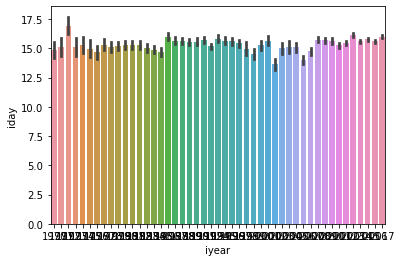

In [10]:
sns.barplot(df['iyear'],df['iday'])


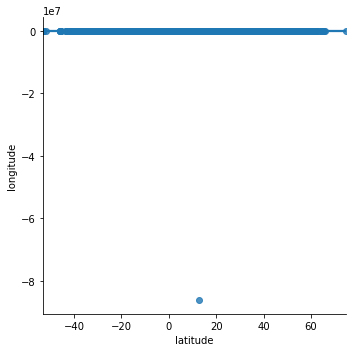

In [45]:
sns.lmplot(x='latitude',y='longitude',data=df)

In [15]:
#here we use a correlation matrix which helps to diagnose and summarises the data for the more advanced analysis
corelation = df.corr()

In [23]:
df = df[['iyear','imonth','iday','country','region','latitude','longitude']]

In [24]:
#checking information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   iyear      181691 non-null  int64  
 1   imonth     181691 non-null  int64  
 2   iday       181691 non-null  int64  
 3   country    181691 non-null  int64  
 4   region     181691 non-null  int64  
 5   latitude   177135 non-null  float64
 6   longitude  177134 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 9.7 MB


In [28]:
print('Most attacked')
print('country:',df['country'].value_counts().idxmax())
print('iday:',df['iday'].value_counts().idxmax())
print('region:',df['region'].value_counts().idxmax())

Most attacked
country: 95
iday: 15
region: 10


# Terrorism attacks per year

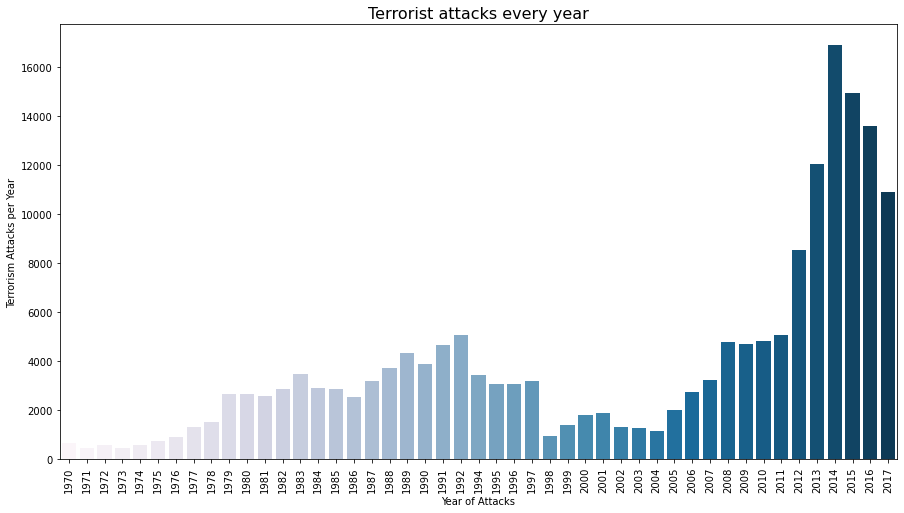

In [41]:
x_year= df['iyear'].unique()
y_count_year =df['iyear'].value_counts(dropna=True).sort_index()
plt.figure(figsize=(15,8))
sns.barplot(x= x_year,y=y_count_year, palette='PuBu')
plt.xticks(rotation =90)
plt.xlabel('Year of Attacks')
plt.ylabel('Terrorism Attacks per Year')
plt.title('Terrorist attacks every year',fontsize=16)
plt.show()

# Most affected countries 

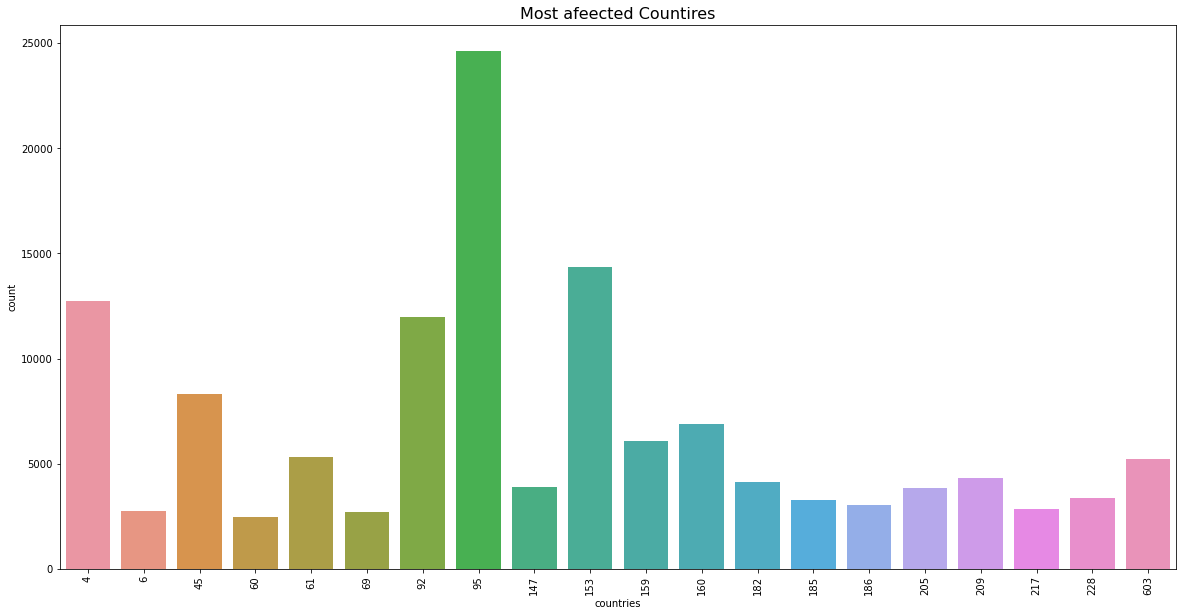

In [39]:
plt.subplots(figsize=(20,10))
sns.barplot(df['country'].value_counts()[:20].index,df['country'].value_counts()[:20].values)

plt.title('Most afeected Countires',fontsize=16)
plt.xlabel('countries')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

# HOT ZONES

Text(0, 0.5, 'Total Number Of attacks')

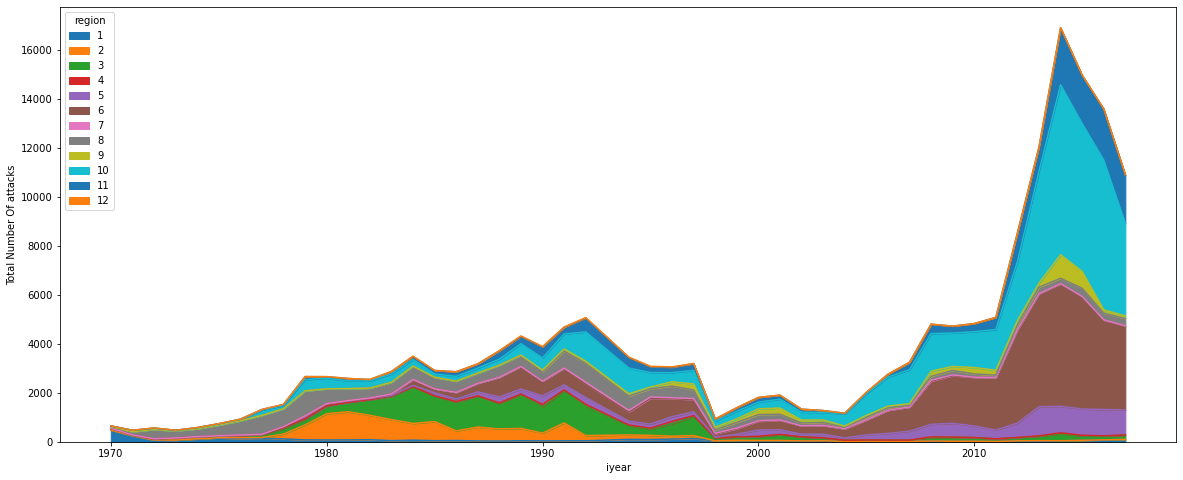

In [53]:
pd.crosstab(df['iyear'],df['region']).plot(kind='area',figsize=(20,8))
plt.xlabel('iyear')
plt.ylabel('Total Number Of attacks')